In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-10000-clean-data-eda/Student_performance_10k.csv


# Task-01


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns
df=pd.read_csv("/kaggle/input/students-performance-10000-clean-data-eda/Student_performance_10k.csv")
df.head()


,roll_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
0,std-01,male,group D,some college,1.0,1.0,89,38.0,85.0,26.0,238.0,C
1,std-02,male,group B,high school,1.0,0.0,65,100.0,67.0,96.0,328.0,A
2,std-03,male,group C,master's degree,1.0,0.0,10,99.0,97.0,58.0,264.0,B
3,std-04,male,group D,some college,1.0,1.0,22,51.0,41.0,84.0,198.0,D
4,std-05,male,group C,some college,0.0,1.0,26,58.0,64.0,65.0,213.0,C


# Task-02

In [4]:
df.shape
df.columns
df.info()
df.describe().loc[['mean', 'min', 'max', 'std']]




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   roll_no                      9999 non-null   object 
 1   gender                       9982 non-null   object 
 2   race_ethnicity               9977 non-null   object 
 3   parental_level_of_education  9978 non-null   object 
 4   lunch                        9976 non-null   float64
 5   test_preparation_course      9977 non-null   float64
 6   math_score                   9976 non-null   object 
 7   reading_score                9975 non-null   float64
 8   writing_score                9976 non-null   float64
 9   science_score                9977 non-null   float64
 10  total_score                  9981 non-null   float64
 11  grade                        9997 non-null   object 
dtypes: float64(6), object(6)
memory usage: 937.6+ KB


,lunch,test_preparation_course,reading_score,writing_score,science_score,total_score
mean,0.644246,0.388694,70.125915,71.415798,66.063045,264.740908
min,0.000000,0.000000,17.000000,10.000000,9.000000,89.000000
max,1.000000,1.000000,100.000000,100.000000,100.000000,383.000000
std,0.478765,0.487478,19.026245,18.245360,19.324331,42.304858


# Task-03

Missing Values in Columns:
roll_no                         1
gender                         18
race_ethnicity                 23
parental_level_of_education    22
lunch                          24
test_preparation_course        23
math_score                     24
reading_score                  25
writing_score                  24
science_score                  23
total_score                    19
grade                           3
dtype: int64


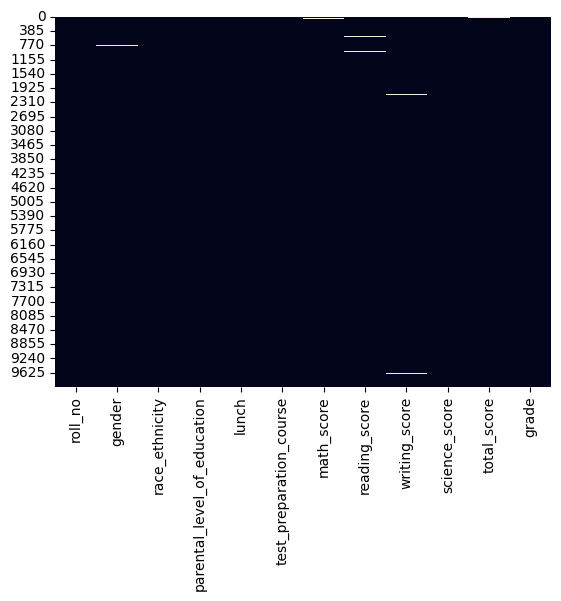

Missing Values After Imputation:
Series([], dtype: int64)


In [44]:
import pandas as pd, seaborn as sns
df = pd.read_csv("/kaggle/input/students-performance-10000-clean-data-eda/Student_performance_10k.csv")
missing = df.isnull().sum()
print(missing[missing > 0])
sns.heatmap(df.isnull(), cbar=False)
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna({col: df[col].mode()[0] if df[col].dtype == 'O' else "Unknown" for col in df.columns}, inplace=True)


## Task-04

In [9]:
import pandas as pd
df = pd.read_csv("/kaggle/input/students-performance-10000-clean-data-eda/Student_performance_10k.csv")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
df = df.drop_duplicates()
print(f"Shape after removing duplicates: {df.shape}")


Number of duplicate rows: 0
Shape after removing duplicates: (10000, 12)


# Task-05

In [11]:
import pandas as pd
df = pd.read_csv("/kaggle/input/students-performance-10000-clean-data-eda/Student_performance_10k.csv")
print(f"Gender unique values: {df['gender'].unique()}")
print(f"Race/Ethnicity unique values: {df['race_ethnicity'].unique()}")
df['math_score'] = pd.to_numeric(df['math_score'], errors='coerce')
df['total_score'] = pd.to_numeric(df['total_score'], errors='coerce')
print(f"Invalid math scores: {df['math_score'].isnull().sum()}")
print(f"Invalid total scores: {df['total_score'].isnull().sum()}")
df['math_score'] = df['math_score'].fillna(df['math_score'].mean())
df['total_score'] = df['total_score'].fillna(df['total_score'].mean())


Gender unique values: ['male' nan 'Boy' '\\tmale' 'female' 'Girl']
Race/Ethnicity unique values: ['group D' 'group B' 'group C' 'group E' 'group A' 'A' nan 'C' 'D'
 'group C\\n' 'B' 'E']
Invalid math scores: 25
Invalid total scores: 19


# Task-06

In [12]:
import pandas as pd
df = pd.read_csv("/kaggle/input/students-performance-10000-clean-data-eda/Student_performance_10k.csv")
print(f"Columns before drop: {df.columns}")
df = df.drop(columns=['roll_no'], errors='ignore')
print(f"Columns after drop: {df.columns}")


Columns before drop: Index(['roll_no', 'gender', 'race_ethnicity', 'parental_level_of_education',
       'lunch', 'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'science_score', 'total_score', 'grade'],
      dtype='object')
Columns after drop: Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'science_score', 'total_score', 'grade'],
      dtype='object')


# Task-07

In [15]:
df['math_score'] = pd.to_numeric(df['math_score'], errors='coerce')
df['reading_score'] = pd.to_numeric(df['reading_score'], errors='coerce')
df['writing_score'] = pd.to_numeric(df['writing_score'], errors='coerce')
df['total_score'] = pd.to_numeric(df['total_score'], errors='coerce')
print(df.dtypes)


roll_no                          object
gender                         category
race_ethnicity                 category
parental_level_of_education      object
lunch                           float64
test_preparation_course         float64
math_score                      float64
reading_score                   float64
writing_score                   float64
science_score                   float64
total_score                     float64
grade                          category
dtype: object


# Task - 08

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


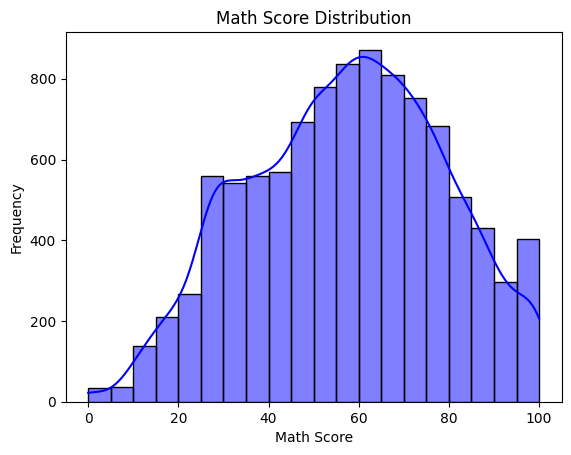

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


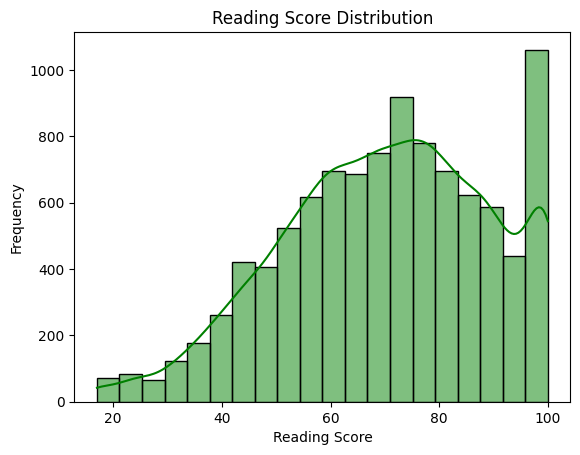

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


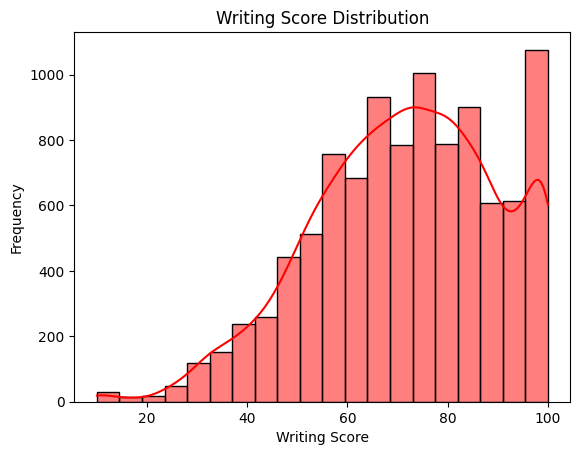

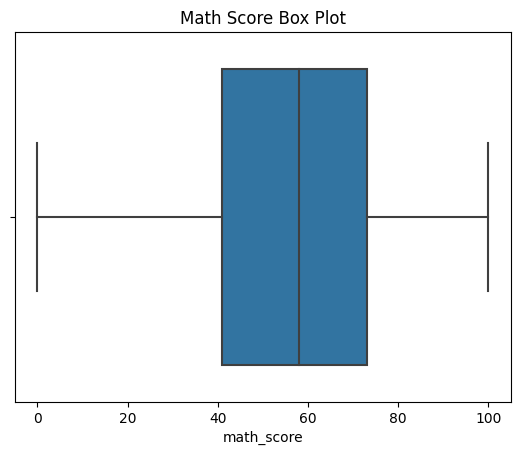

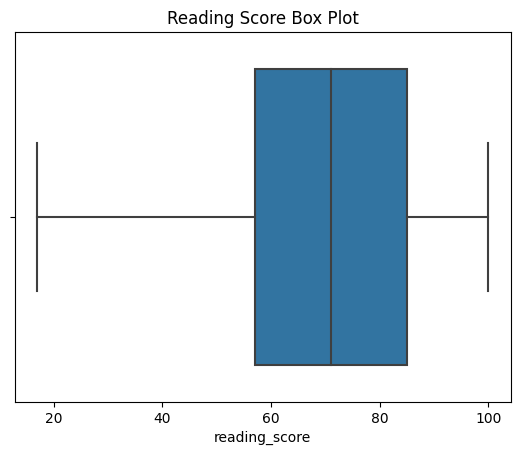

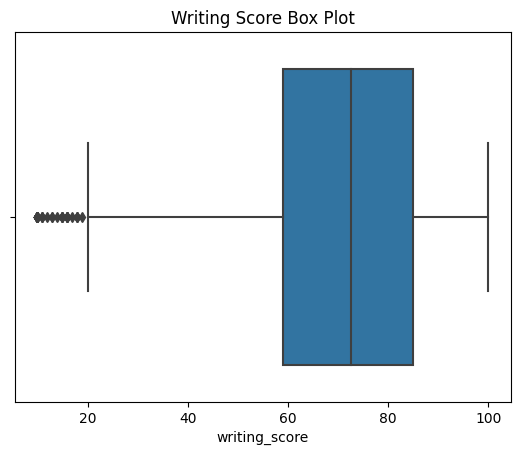

In [19]:
import numpy as np

df.replace([np.inf, -np.inf], np.nan, inplace=True)

sns.histplot(df['math_score'], kde=True, color='blue', bins=20)
plt.title('Math Score Distribution')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()

sns.histplot(df['reading_score'], kde=True, color='green', bins=20)
plt.title('Reading Score Distribution')
plt.xlabel('Reading Score')
plt.ylabel('Frequency')
plt.show()

sns.histplot(df['writing_score'], kde=True, color='red', bins=20)
plt.title('Writing Score Distribution')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(x=df['math_score'])
plt.title('Math Score Box Plot')
plt.show()

sns.boxplot(x=df['reading_score'])
plt.title('Reading Score Box Plot')
plt.show()

sns.boxplot(x=df['writing_score'])
plt.title('Writing Score Box Plot')
plt.show()


# Task-09

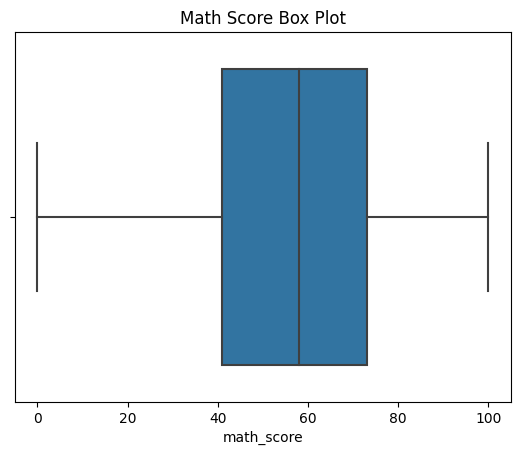

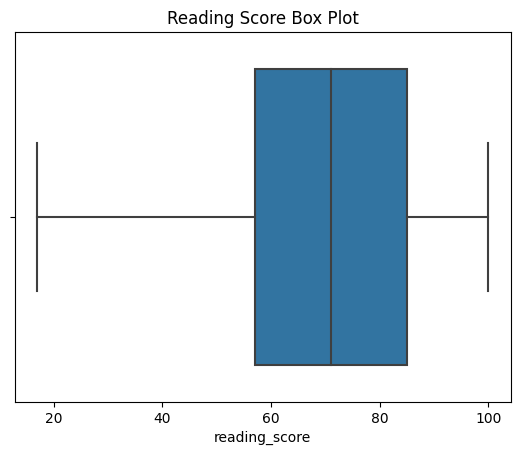

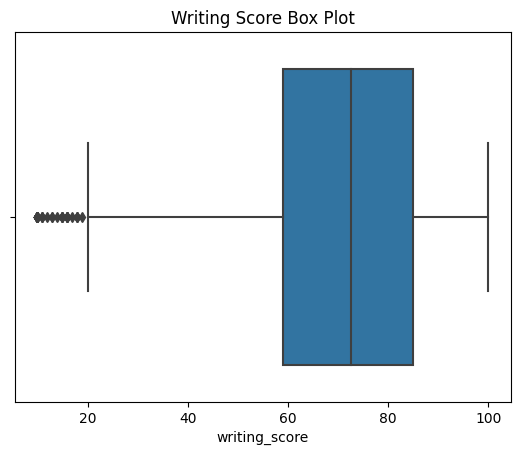

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df['math_score'] = pd.to_numeric(df['math_score'], errors='coerce')
df['reading_score'] = pd.to_numeric(df['reading_score'], errors='coerce')
df['writing_score'] = pd.to_numeric(df['writing_score'], errors='coerce')

sns.boxplot(x=df['math_score'])
plt.title('Math Score Box Plot')
plt.show()

sns.boxplot(x=df['reading_score'])
plt.title('Reading Score Box Plot')
plt.show()

sns.boxplot(x=df['writing_score'])
plt.title('Writing Score Box Plot')
plt.show()

def outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lb = q1 - 1.5 * iqr
    ub = q3 + 1.5 * iqr
    return lb, ub

lb_m, ub_m = outliers(df, 'math_score')
out_m = df[(df['math_score'] < lb_m) | (df['math_score'] > ub_m)]

lb_r, ub_r = outliers(df, 'reading_score')
out_r = df[(df['reading_score'] < lb_r) | (df['reading_score'] > ub_r)]

lb_w, ub_w = outliers(df, 'writing_score')
out_w = df[(df['writing_score'] < lb_w) | (df['writing_score'] > ub_w)]

df_no_out = df[
    (df['math_score'] >= lb_m) & (df['math_score'] <= ub_m) &
    (df['reading_score'] >= lb_r) & (df['reading_score'] <= ub_r) &
    (df['writing_score'] >= lb_w) & (df['writing_score'] <= ub_w)
]

df['math_score'] = np.clip(df['math_score'], lb_m, ub_m)
df['reading_score'] = np.clip(df['reading_score'], lb_r, ub_r)
df['writing_score'] = np.clip(df['writing_score'], lb_w, ub_w)

df['math_score'] = np.log(df['math_score'] + 1)
df['reading_score'] = np.log(df['reading_score'] + 1)
df['writing_score'] = np.log(df['writing_score'] + 1)


# Task-10

In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df_ohe = pd.get_dummies(df, columns=['gender', 'grade'], drop_first=True)

le = LabelEncoder()
df['gender_enc'] = le.fit_transform(df['gender'])
df['grade_enc'] = le.fit_transform(df['grade'])

print(df_ohe.head())
print(df[['gender_enc', 'grade_enc']].head())


  roll_no race_ethnicity parental_level_of_education  lunch  \
0  std-01        group D                some college    1.0   
1  std-02        group B                 high school    1.0   
2  std-03        group C             master's degree    1.0   
3  std-04        group D                some college    1.0   
4  std-05        group C                some college    0.0   

   test_preparation_course  math_score  reading_score  writing_score  \
0                      1.0    4.499810       3.663562       4.454347   
1                      0.0    4.189655       4.615121       4.219508   
2                      0.0    2.397895       4.605170       4.584967   
3                      1.0    3.135494       3.951244       3.737670   
4                      1.0    3.295837       4.077537       4.174387   

   science_score  total_score  gender_Girl  gender_\tmale  gender_female  \
0           26.0        238.0        False          False          False   
1           96.0        328.0       

# Task-11

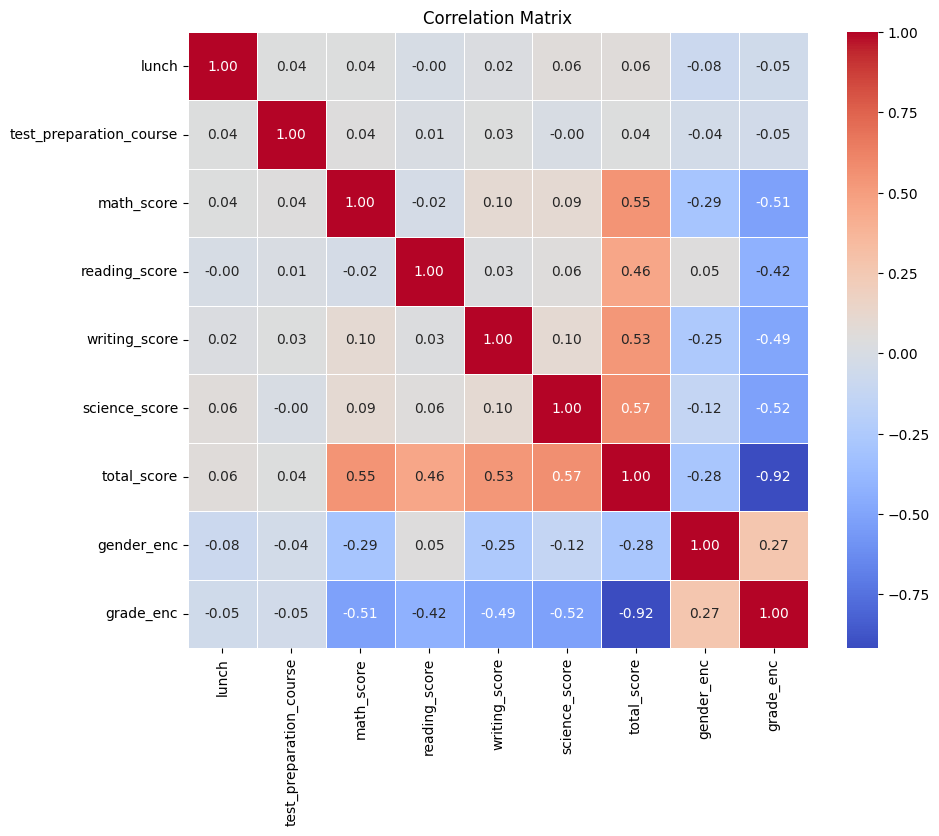

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

df_numeric = df.select_dtypes(include=['number'])
corr_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# Task-12

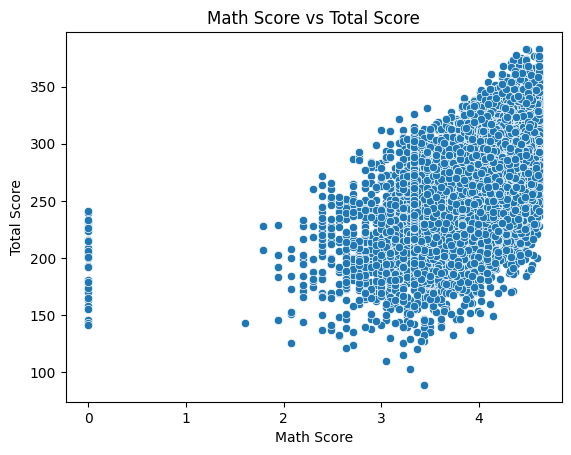

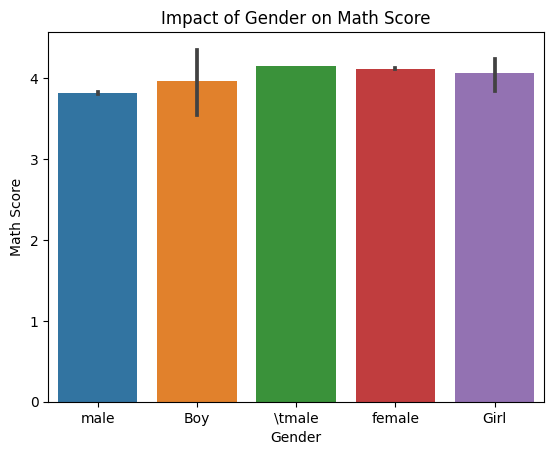

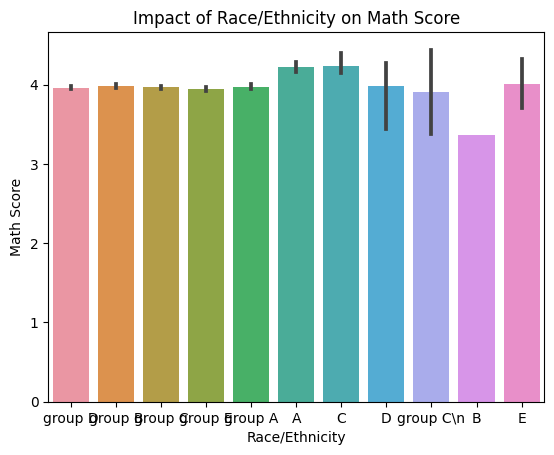

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=df['math_score'], y=df['total_score'])
plt.title('Math Score vs Total Score')
plt.xlabel('Math Score')
plt.ylabel('Total Score')
plt.show()

sns.barplot(x=df['gender'], y=df['math_score'])
plt.title('Impact of Gender on Math Score')
plt.xlabel('Gender')
plt.ylabel('Math Score')
plt.show()

sns.barplot(x=df['race_ethnicity'], y=df['math_score'])
plt.title('Impact of Race/Ethnicity on Math Score')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Math Score')
plt.show()


# Task-13

In [32]:
df['perf_ratio'] = df['total_score'] / 100
df['math_score_bin'] = pd.cut(df['math_score'], bins=[0, 50, 70, 90, 100], labels=['low', 'medium', 'high', 'very high'])
df['reading_score_bin'] = pd.cut(df['reading_score'], bins=[0, 50, 70, 90, 100], labels=['low', 'medium', 'high', 'very high'])
df['writing_score_bin'] = pd.cut(df['writing_score'], bins=[0, 50, 70, 90, 100], labels=['low', 'medium', 'high', 'very high'])
print(df[['perf_ratio', 'math_score_bin', 'reading_score_bin', 'writing_score_bin']])


      perf_ratio math_score_bin reading_score_bin writing_score_bin
0           2.38            low               low               low
1           3.28            low               low               low
2           2.64            low               low               low
3           1.98            low               low               low
4           2.13            low               low               low
...          ...            ...               ...               ...
9995        2.42            low               low               low
9996        3.01            low               low               low
9997        3.31            low               low               low
9998        3.36            low               low               low
9999        2.93            low               low               low

[10000 rows x 4 columns]


# Task-14

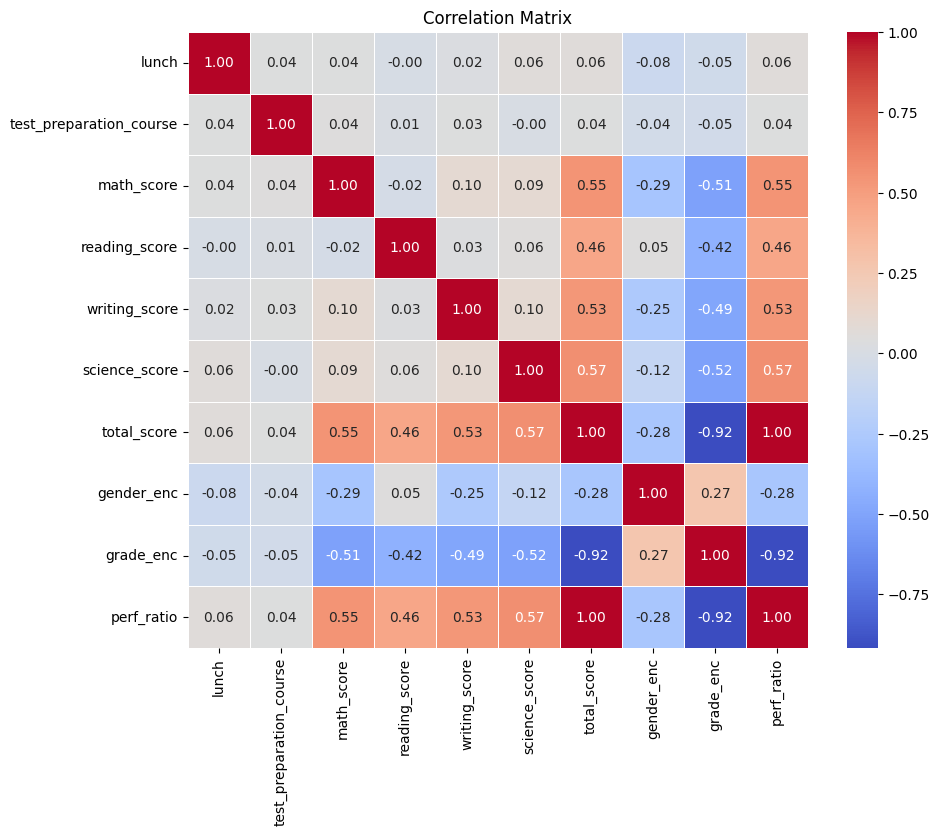

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_

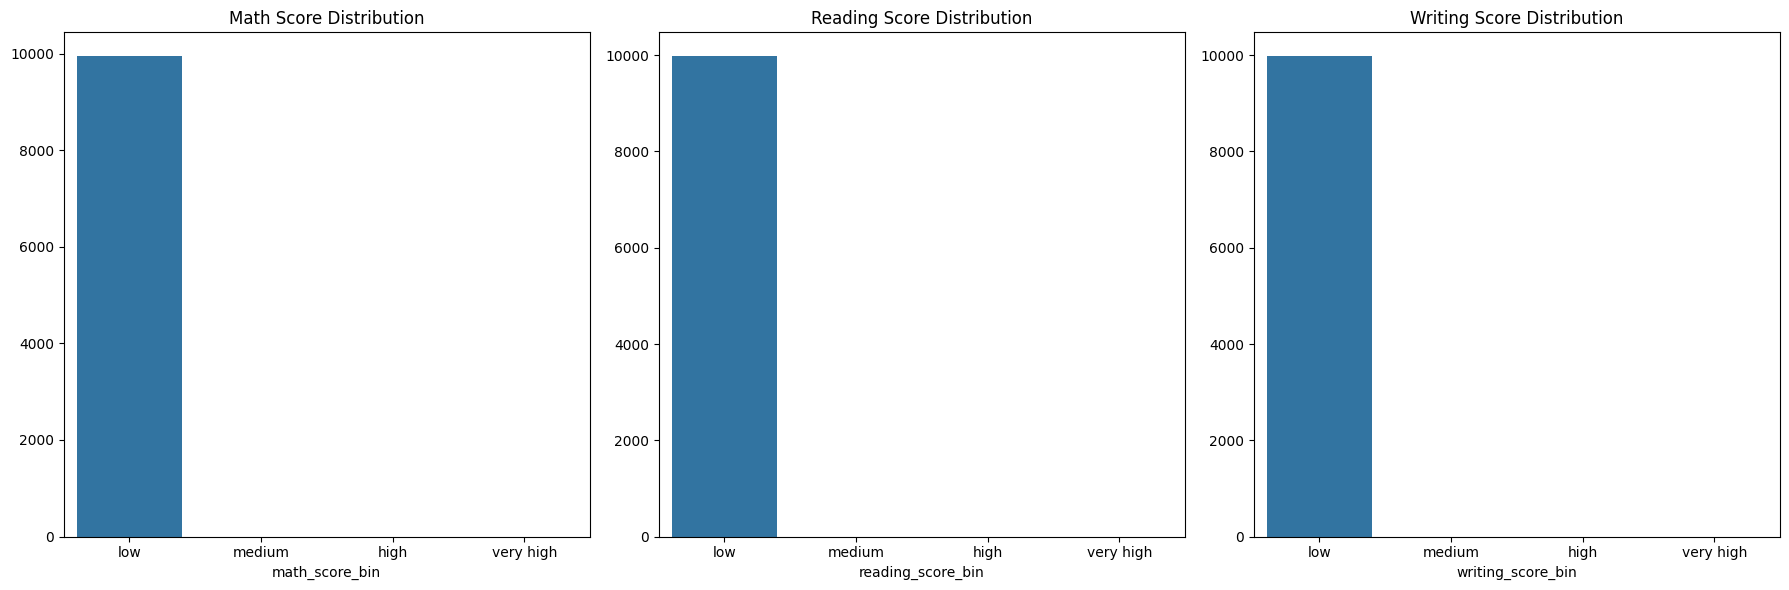

Missing Data Summary:
roll_no                         1
gender                         18
race_ethnicity                 23
parental_level_of_education    22
lunch                          24
test_preparation_course        23
math_score                     25
reading_score                  25
writing_score                  24
science_score                  23
total_score                    19
grade                           3
gender_enc                      0
grade_enc                       0
perf_ratio                     19
math_score_bin                 58
reading_score_bin              25
writing_score_bin              24
dtype: int64

Outlier Summary:
{'math_score': {'lb': 2.98250936598326, 'ub': 4.952951672880255, 'outliers': 370}, 'reading_score': {'lb': 3.6107422193140395, 'ub': 4.831994900631654, 'outliers': 422}, 'writing_score': {'lb': 3.6843560433104376, 'ub': 4.80745893759596, 'outliers': 472}}

Correlation Matrix:
                            lunch  test_preparation_course

In [43]:
df_numeric = df.select_dtypes(include=['number'])
corr_mat = df_numeric.corr()
df['math_score_bin'] = pd.cut(df['math_score'], bins=[0, 50, 70, 90, 100], labels=['low', 'medium', 'high', 'very high'])
df['reading_score_bin'] = pd.cut(df['reading_score'], bins=[0, 50, 70, 90, 100], labels=['low', 'medium', 'high', 'very high'])
df['writing_score_bin'] = pd.cut(df['writing_score'], bins=[0, 50, 70, 90, 100], labels=['low', 'medium', 'high', 'very high'])


miss_data = df.isnull().sum()

outliers_sum = {
    'math_score': {'lb': lb_m, 'ub': ub_m, 'outliers': out_m.shape[0]},
    'reading_score': {'lb': lb_r, 'ub': ub_r, 'outliers': out_r.shape[0]},
    'writing_score': {'lb': lb_w, 'ub': ub_w, 'outliers': out_w.shape[0]}
}


score_bins = {
    'math_score': df['math_score_bin'].value_counts(),
    'reading_score': df['reading_score_bin'].value_counts(),
    'writing_score': df['writing_score_bin'].value_counts()
}
gender_math = df.groupby('gender')['math_score'].mean()
perf_sum = df['perf_ratio'].describe()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.barplot(x=df['math_score_bin'].value_counts().index, y=df['math_score_bin'].value_counts().values, ax=ax[0])
ax[0].set_title('Math Score Distribution')
sns.barplot(x=df['reading_score_bin'].value_counts().index, y=df['reading_score_bin'].value_counts().values, ax=ax[1])
ax[1].set_title('Reading Score Distribution')
sns.barplot(x=df['writing_score_bin'].value_counts().index, y=df['writing_score_bin'].value_counts().values, ax=ax[2])
ax[2].set_title('Writing Score Distribution')
plt.tight_layout()
plt.show()
print("Missing Data Summary:")
print(miss_data)
print("\nOutlier Summary:")
print(outliers_sum)
print("\nCorrelation Matrix:")
print(corr_mat)
print("\nScore Distribution (Binned):")
print(score_bins)
print("\nGender vs Math Score Mean:")
print(gender_math)
print("\nPerformance Summary (Performance Ratio):")
print(perf_sum)
